# Data Overview

Import all important libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!unzip /content/immo_data.csv.zip

Archive:  /content/immo_data.csv.zip
  inflating: immo_data.csv           


In [ ]:
imo=pd.read_csv("immo_data.csv")
imo.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [ ]:
print("# of features in immo: ", len(imo.columns))
print("# of records in immo: ", len(imo))

# of features in immo:  49
# of records in immo:  268850


In [ ]:
imo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
imo.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


# Preprocessing data

- deleting outliers

In [ ]:
imo = imo[imo.baseRent.between(50,10000, inclusive=True)]
imo = imo[imo.noRooms.between(0,15, inclusive=True)]
imo = imo[imo.livingSpace.between(50,30000, inclusive=True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


**Delete duplicates**

In [ ]:
imo=imo.drop_duplicates() 

**Checking the missing data**






In [ ]:
print(imo.isna().sum())

regio1                           0
serviceCharge                 5388
heatingType                  34844
telekomTvOffer               26928
telekomHybridUploadSpeed    182421
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1577
telekomUploadSpeed           27557
totalRent                    33815
yearConstructed              44842
scoutId                          0
noParkSpaces                136397
firingTypes                  44984
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         44842
baseRent                         0
houseNumber                  60687
livingSpace                      0
geo_krs                          0
condition                    53336
interiorQual                 89331
petsAllowed                  92080
street                           0
streetPlain                  60684
lift                

**Delete culomns with more than %30 null values (if such columns exist):**

In [ ]:
nullcolumns=imo.columns[((imo.isna().sum()/len(imo)) > 0.30)] #mask
imo=imo.drop(nullcolumns,axis=1)
imo.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,noRooms,floor,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,...,4.0,1.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,...,3.0,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,...,3.0,3.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,...,3.0,3.0,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,...,3.0,1.0,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20


In [ ]:
imo.shape

(218354, 38)

we have to predict rental price ('baseRent') so we should drop all the rows that doesn't deal with rental price

In [ ]:
col=['telekomTvOffer','pricetrend','livingSpaceRange','street','description',
                      'facilities','geo_krs','geo_plz','scoutId','regio1','telekomUploadSpeed',
                      'telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',
                      'houseNumber','streetPlain','firingTypes']
imo=imo.drop(col,axis=1)
print(imo.shape)


(218354, 19)


**Filling NaN numeric datas with mean of each column**

In [ ]:
imo.fillna(imo._get_numeric_data().mean(),inplace = True)
imo.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,regio2
0,245.00,central_heating,False,False,840.00000,1965.0,False,True,2.0,595.0,86.00,well_kept,False,4,ground_floor,4.0,1.000000,True,Dortmund
1,134.00,self_contained_central_heating,False,True,990.77173,1871.0,False,False,1.0,800.0,89.00,refurbished,False,5,ground_floor,3.0,2.122311,False,Rhein_Pfalz_Kreis
2,255.00,floor_heating,True,True,1300.00000,2019.0,False,True,9.0,965.0,83.80,first_time_use,True,6,apartment,3.0,3.000000,False,Dresden
3,58.15,district_heating,False,True,990.77173,1964.0,False,False,2.0,343.0,58.15,NaN,False,2,other,3.0,3.000000,False,Mittelsachsen_Kreis
4,138.00,self_contained_central_heating,False,True,903.00000,1950.0,False,False,1.0,765.0,84.97,refurbished,False,5,apartment,3.0,1.000000,False,Bremen


**Delete outlier data**

In [ ]:
imo = imo[imo.baseRent.between(65,8000, inclusive=True)]
imo = imo[imo.noRooms.between(1,12, inclusive=True)]
imo = imo[imo.livingSpace.between(60,10000, inclusive=True)]
imo.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until


(173619, 19)

**Dataset distribution plot after deleting outlier data**

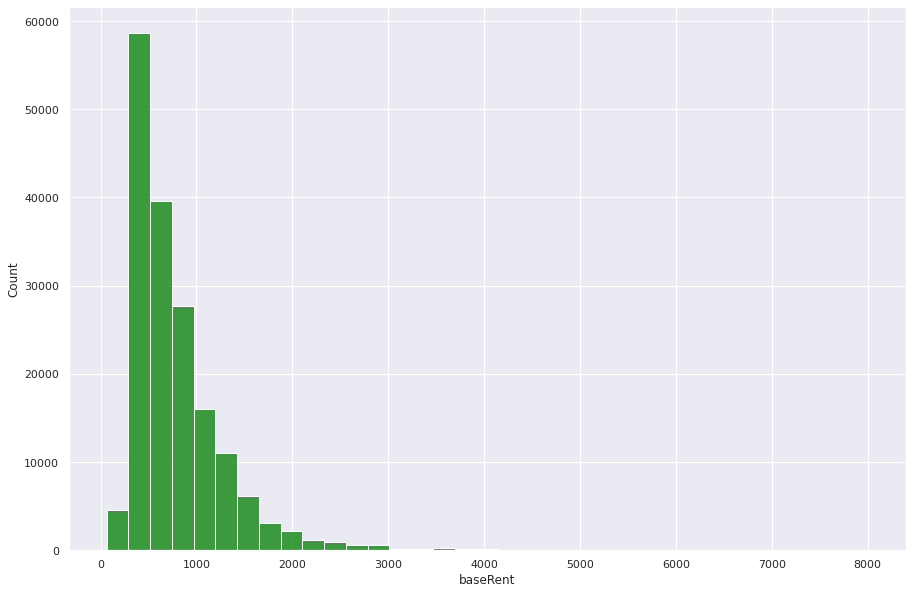

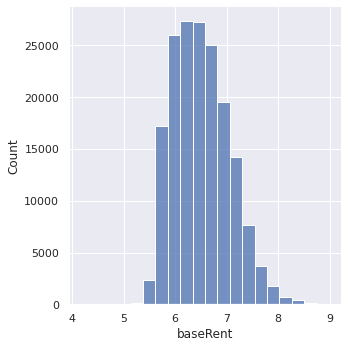

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.histplot(imo['baseRent'],bins=35,color='green')  
plt.show()

sns.set(rc={'figure.figsize':(15,10)})
sns.displot(np.log(imo["baseRent"]),kde_kws={"label": 'livingSpace'}, bins=20)

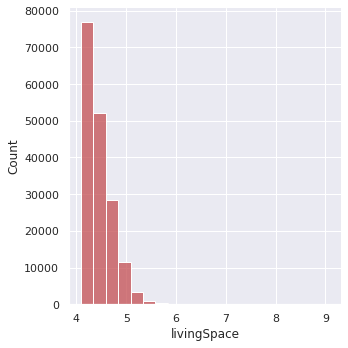

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(np.log(imo["livingSpace"]),kde_kws={"label": 'livingSpace'},color='r' ,bins=20)

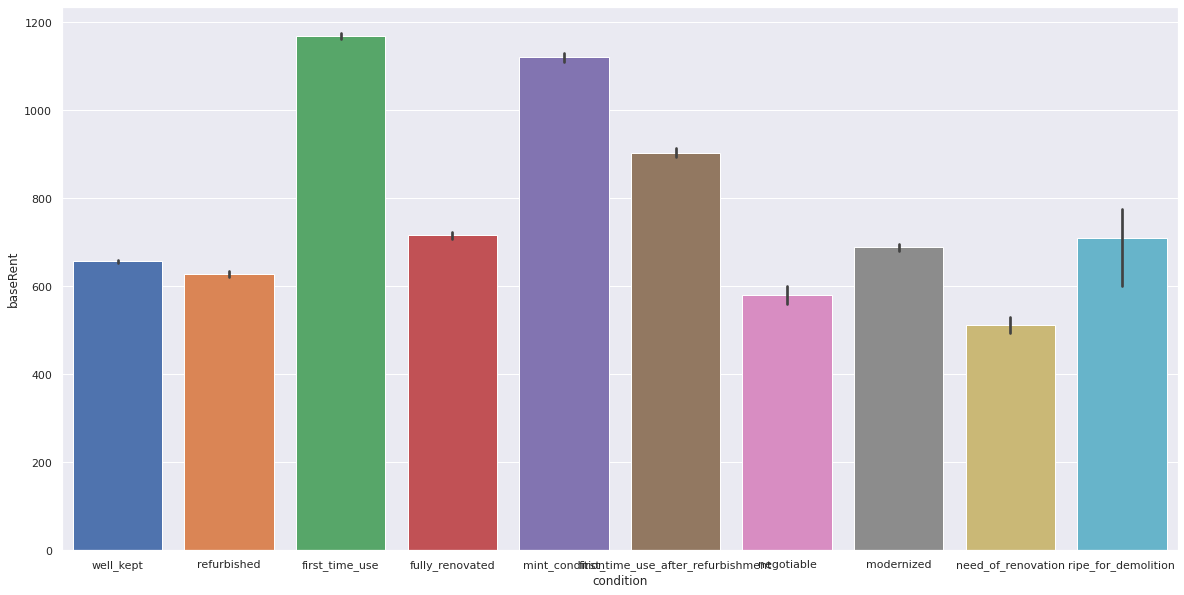

In [ ]:
plt.figure(figsize=(20,10))

sns.barplot(x=imo.condition, y=imo.baseRent,saturation=0.95)
plt.show()

# **filling categorical data**

we can replace null datas using 2 methods:
1. replace with most frequents of each columns       or
2. replace with pre-phrases

**Fill NaN values with most frequents**

In [ ]:
for cols in imo.columns:
   if (imo[cols].dtypes == 'object' or imo[cols].dtypes == 'bool'):
       imo[cols].fillna(imo[cols].value_counts().head(1).index[0],inplace=True)

**Categorical features**

In [ ]:
import datetime
from datetime import date
imo['yearConstructed'] = date.today().year - imo["yearConstructed"]

**Reduce number of categories**

In [ ]:
otherscondition = imo['condition'].value_counts().tail(3).index
othersregion = list(imo['condition'].value_counts().tail(3).index)
def editcondition(dflist):
    if dflist in otherscondition:
        return 'Other'
    else:
        return dflist

imo['condition_edit'] =imo['condition'].apply(editcondition)
othersheatingType = imo['heatingType'].value_counts().head(3).index

othersregion = list(imo['heatingType'].value_counts().head(3).index)
def editheatingType(dflist):
    if dflist in othersheatingType:
        return 'Other'
    else:
        return dflist

imo['heatingType_edit'] =imo['heatingType'].apply(editheatingType)

imo = imo.drop(columns = ['heatingType'])
imo['heatingType_edit'].value_counts()*100 / len(imo)
others = list(imo['regio2'].value_counts().head(10).index)
def edit_name(x):
    if x in others:
        return 'other'
    else:
        return x

imo['regio2_edit'] = imo['regio2'].apply(edit_name)
imo = imo.drop(columns = ['regio2'])
imo.head()

,serviceCharge,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,condition_edit,heatingType_edit,regio2_edit
0,245.0,False,False,840.00000,57.000000,False,True,2.000000,595.0,86.00,well_kept,False,4,ground_floor,4.0,1.000000,True,well_kept,Other,Dortmund
1,134.0,False,True,990.77173,151.000000,False,False,1.000000,800.0,89.00,refurbished,False,5,ground_floor,3.0,2.122311,False,refurbished,self_contained_central_heating,Rhein_Pfalz_Kreis
2,255.0,True,True,1300.00000,3.000000,False,True,9.000000,965.0,83.80,first_time_use,True,6,apartment,3.0,3.000000,False,first_time_use,Other,other
4,138.0,False,True,903.00000,72.000000,False,False,1.000000,765.0,84.97,refurbished,False,5,apartment,3.0,1.000000,False,refurbished,self_contained_central_heating,Bremen
6,70.0,False,False,380.00000,54.832749,False,True,3.821194,310.0,62.00,fully_renovated,False,2,apartment,2.0,1.000000,True,fully_renovated,self_contained_central_heating,Mittelsachsen_Kreis


below rows contains less data to predict anything so we choose just the top values

In [ ]:
regionlist = list(imo['regio2_edit'].value_counts().head(25).index)
regionlist

['other',
 'Duisburg',
 'Recklinghausen_Kreis',
 'Dortmund',
 'Halle_Saale',
 'Gelsenkirchen',
 'Köln',
 'Wuppertal',
 'Bremen',
 'Mittelsachsen_Kreis',
 'Wiesbaden',
 'Zwickau',
 'Hannover',
 'Aachen',
 'Stuttgart',
 'Zwickau_Kreis',
 'Bochum',
 'Mettmann_Kreis',
 'Meißen_Kreis',
 'Märkischer_Kreis',
 'Leipzig_Kreis',
 'Sächsische_Schweiz_Osterzgebirge_Kreis',
 'Nürnberg',
 'Erzgebirgskreis',
 'Mönchengladbach']

In [ ]:
imo = imo[pd.DataFrame(imo['regio2_edit'].tolist()).isin(regionlist).any(1).values]
imo.head()

,serviceCharge,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,condition_edit,heatingType_edit,regio2_edit
0,245.0,False,False,840.00,57.000000,False,True,2.000000,595.00,86.00,well_kept,False,4,ground_floor,4.0,1.000000,True,well_kept,Other,Dortmund
2,255.0,True,True,1300.00,3.000000,False,True,9.000000,965.00,83.80,first_time_use,True,6,apartment,3.0,3.000000,False,first_time_use,Other,other
4,138.0,False,True,903.00,72.000000,False,False,1.000000,765.00,84.97,refurbished,False,5,apartment,3.0,1.000000,False,refurbished,self_contained_central_heating,Bremen
6,70.0,False,False,380.00,54.832749,False,True,3.821194,310.00,62.00,fully_renovated,False,2,apartment,2.0,1.000000,True,fully_renovated,self_contained_central_heating,Mittelsachsen_Kreis
7,88.0,False,True,584.25,63.000000,False,True,2.000000,452.25,60.30,well_kept,False,3,ground_floor,3.0,2.122311,False,well_kept,Other,Bremen


**Correlation matrix**



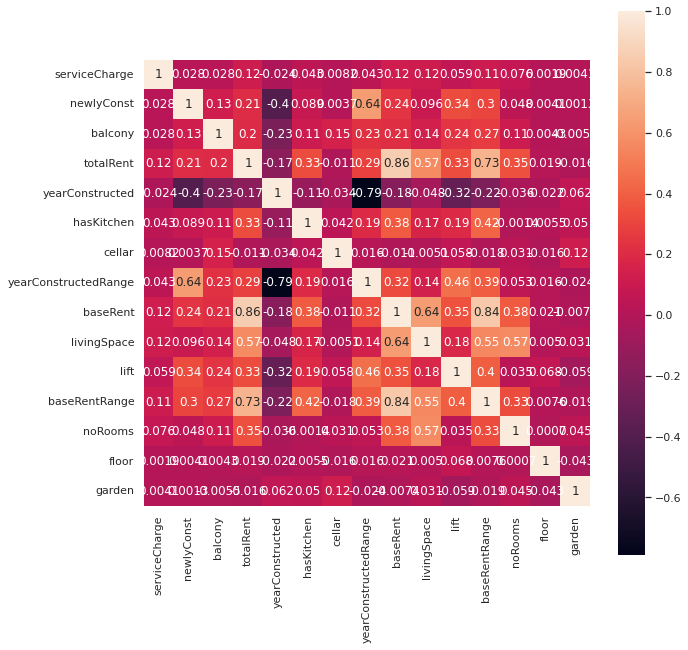

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
corr=imo.corr()
f,ax=plt.subplots(figsize=(10,10))

sns.heatmap(corr,square= True,annot=True,vmax=None, cmap=None, center=None,
            cbar=True, cbar_kws=None, cbar_ax=None,  xticklabels="auto", yticklabels="auto")


In [ ]:
imo=imo.fillna(method="ffill")

# **convert categorical data to dummies**

In [ ]:
columns1=[]
for cols in imo.columns:
    if imo[cols].dtype == 'object' or imo[cols].dtype == 'bool':
        columns1.append(cols)   
columns1=['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'condition', 'lift',
          'typeOfFlat', 'garden', 'condition_edit', 'heatingType_edit', 'regio2_edit']
s=pd.Series(columns1)
dummies_feature=pd.get_dummies(s)
dummies_feature


,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat
0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
imo.drop(columns=columns1,inplace=True)
imo=pd.concat([imo,dummies_feature],axis=1)
imo = imo.dropna(how='all', axis=1)
imo=imo.fillna(method="ffill")
imo = imo[(imo['baseRent'] > 50) & (imo['baseRent'] <7850)]   #delete outlier data
imo = imo[(imo['totalRent'] > 0) & (imo['totalRent'] < 63204.0)]

**linear regression**

In [ ]:
imo.head()

,serviceCharge,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,floor,balcony,cellar,condition,condition_edit,garden,hasKitchen,heatingType_edit,lift,newlyConst,regio2_edit,typeOfFlat
0,245.0,840.0,57.0,2.0,595.0,86.00,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,245.0,840.0,57.0,2.0,595.0,86.00,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,255.0,1300.0,3.0,9.0,965.0,83.80,6.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,255.0,1300.0,3.0,9.0,965.0,83.80,6.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,138.0,903.0,72.0,1.0,765.0,84.97,5.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(imo['totalRent']).reshape((-1, 1))
X=imo['baseRent']
y = np.array(imo['baseRent'])

In [ ]:
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)


**Get results**

properties of the model

In [ ]:

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:')
print(model.intercept_)
print('slope:')
print(model.coef_)

coefficient of determination: 0.8181088893876932
intercept:
-75.34484185054635
slope:
[0.88618454]


In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 669.0501751   669.0501751  1076.69506533 ...  518.39880262  824.1324703
  802.66175184]


**Linear Regression**

MAE: 108.68639773806204
MSE: 83227.27977578153
R2_score: 0.8181088893876932


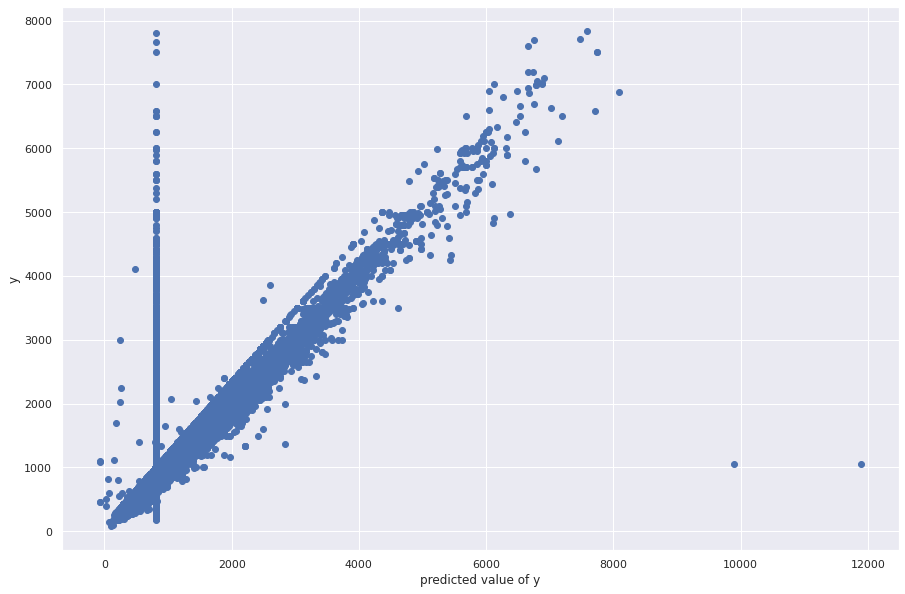

In [ ]:
from pyparsing.core import LineStart
X=X.values.reshape(-1, 1)
from sklearn import metrics
prediction = []
def linearregression(X, y_pred, x, y):
    linreg = LinearRegression()
    linreg.fit(X, y_pred)
    y_pred = linreg.predict(X)

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('R2_score:', metrics.r2_score(y, y_pred))

plt.scatter(y_pred,y)
plt.xlabel('predicted value of y')
plt.ylabel('y')

linearregression(X, y_pred, x, y)

MAE: 108.68639773806204
MSE: 83227.27977578153
R2_score: 0.8181088893876932


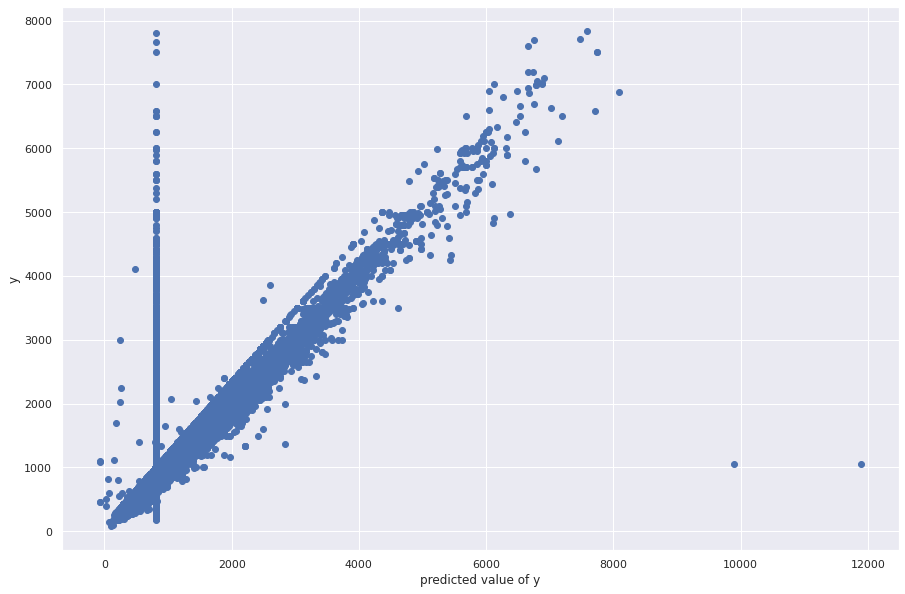

<Figure size 1080x720 with 0 Axes>

In [ ]:
from sklearn import metrics
prediction = []
def linearregression(X, y_pred, x, y):
    linreg = LinearRegression()
    linreg.fit(X, y_pred)
    y_pred = linreg.predict(X)

print('MAE:', metrics.mean_absolute_error(y, y_pred))
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('R2_score:', metrics.r2_score(y, y_pred))

plt.scatter(y_pred,y)
plt.xlabel('predicted value of y')
plt.ylabel('y')
plt.figure()
linearregression(X, y_pred, x, y)

Random Forest Regresson

MAE: 83.14066136401831
MSE: 28065.93117971181
R2_score: 0.9386626187182937


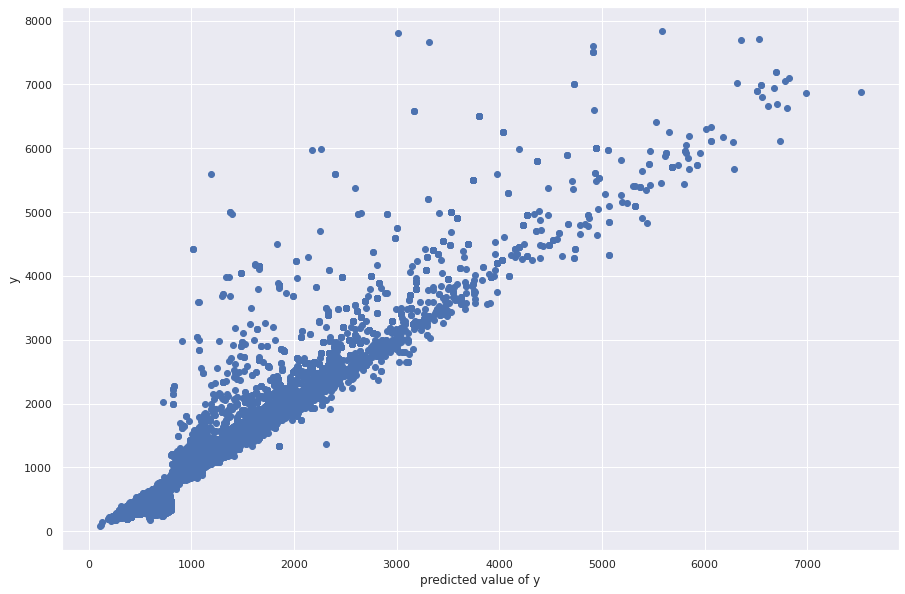

<Figure size 1080x720 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

def RandomForest(X, y_pred, x, y):
    randomForest = RandomForestRegressor()
    randomForest.fit(X, y_pred)
    y_pred = randomForest.predict(X)
    
    print('MAE:', metrics.mean_absolute_error(y, y_pred))
    print('MSE:', metrics.mean_squared_error(y, y_pred))
    print('R2_score:', metrics.r2_score(y, y_pred))

    plt.scatter(y_pred,y,cmap ='plasma')
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()

RandomForest(X, y_pred, x, y)